In [34]:
#coding: utf8
import pandas as pd 

URL = 'http://nidss.cdc.gov.tw/download/Dengue_Daily.csv'
#df = pd.read_csv('data/Dengue_Daily2.csv',sep='\t')
df = pd.read_csv(URL)

#df1 = pd.read_csv(URL)
#df1.to_csv('test.csv', encoding='utf8')
df['date'] = df['發病日'].apply(lambda x: x + ' 08:00:00')
df['date'] = pd.to_datetime(df['date'])

df['發病日2'] = pd.to_datetime(df['發病日'])
df['通報日2'] = pd.to_datetime(df['通報日'])
df.to_csv('data/Dengue_Daily_utf8.csv')


In [2]:
df.tail(5)

,發病日,個案研判日,通報日,性別,年齡層,居住縣市,居住鄉鎮,居住村里,感染縣市,感染鄉鎮,感染村里,是否境外移入,感染國家,確定病例數,date,發病日2,通報日2
44458,2015/09/14,2015/09/15,2015/09/14,男,60-64,台南市,東區,崇信里,NaN,NaN,NaN,否,NaN,1,2015-09-14 08:00:00,2015-09-14,2015-09-14
44459,2015/09/14,2015/09/15,2015/09/14,男,10-14,台南市,南區,開南里,台南市,南區,開南里,否,中華民國,1,2015-09-14 08:00:00,2015-09-14,2015-09-14
44460,2015/09/14,2015/09/15,2015/09/14,女,65-69,台南市,安平區,怡平里,台南市,安平區,怡平里,否,中華民國,1,2015-09-14 08:00:00,2015-09-14,2015-09-14
44461,2015/09/14,2015/09/15,2015/09/14,女,55-59,台南市,北區,大和里,台南市,北區,大和里,否,中華民國,1,2015-09-14 08:00:00,2015-09-14,2015-09-14
44462,2015/09/15,2015/09/15,2015/09/15,男,45-49,高雄市,三民區,鳳南里,高雄市,三民區,鳳南里,否,中華民國,1,2015-09-15 08:00:00,2015-09-15,2015-09-15


In [3]:
HL = df[df['居住縣市'].str.contains('花蓮') & df['發病日'].str.contains('2015')]
HL

,發病日,個案研判日,通報日,性別,年齡層,居住縣市,居住鄉鎮,居住村里,感染縣市,感染鄉鎮,感染村里,是否境外移入,感染國家,確定病例數,date,發病日2,通報日2
35095,2015/08/12,2015/08/16,2015/08/16,男,30-34,花蓮縣,吉安鄉,NaN,NaN,NaN,NaN,是,菲律賓,1,2015-08-12 08:00:00,2015-08-12,2015-08-16
35513,2015/08/16,2015/08/18,2015/08/18,女,15-19,花蓮縣,吉安鄉,慶豐村,NaN,NaN,NaN,是,印度,1,2015-08-16 08:00:00,2015-08-16,2015-08-18
36726,2015/08/23,2015/08/26,2015/08/24,男,35-39,花蓮縣,壽豐鄉,月眉村,高雄市,左營區,NaN,否,中華民國,1,2015-08-23 08:00:00,2015-08-23,2015-08-24


Populating the interactive namespace from numpy and matplotlib
發病日               object
個案研判日             object
通報日               object
性別                object
年齡層               object
居住縣市              object
居住鄉鎮              object
居住村里              object
感染縣市              object
感染鄉鎮              object
感染村里              object
是否境外移入            object
感染國家              object
確定病例數              int64
date      datetime64[ns]
發病日2      datetime64[ns]
通報日2      datetime64[ns]
dtype: object
Axes(0.125,0.125;0.775x0.775)


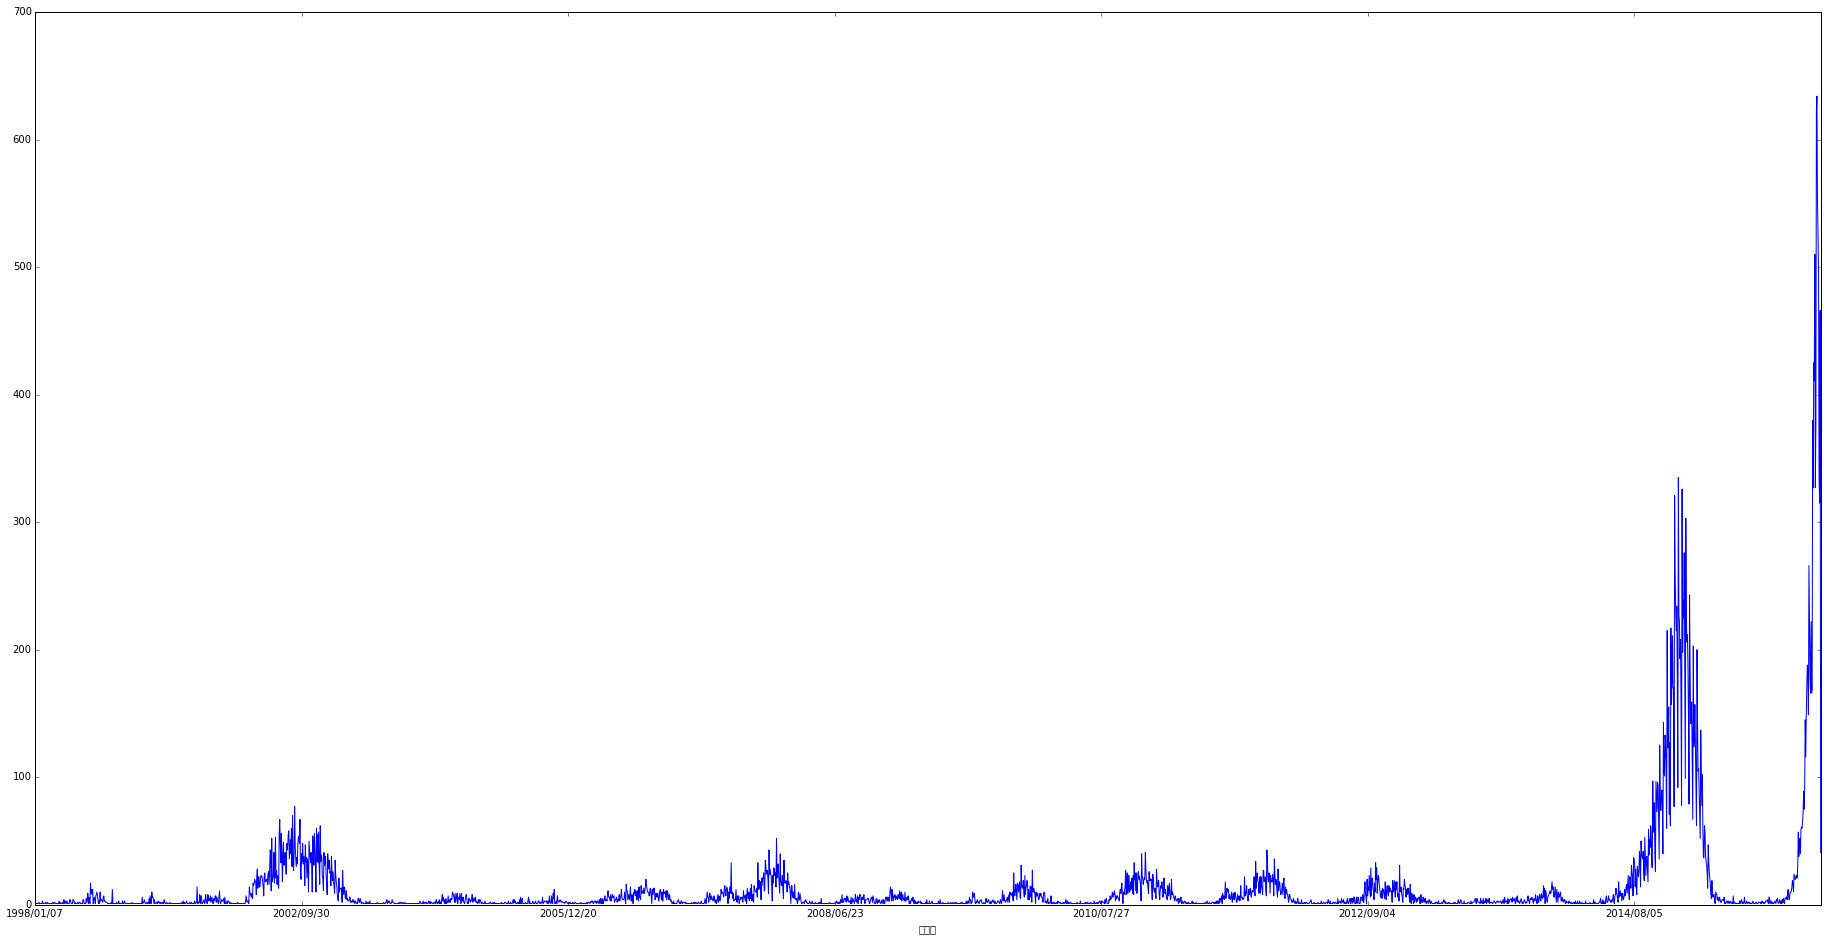

In [4]:
%pylab inline
print df.dtypes
df2015 = df[ df['發病日'].str.contains('2015') ]
print df.groupby(['通報日'])['確定病例數'].sum().plot(figsize=(32,16))

Axes(0.125,0.125;0.775x0.775)


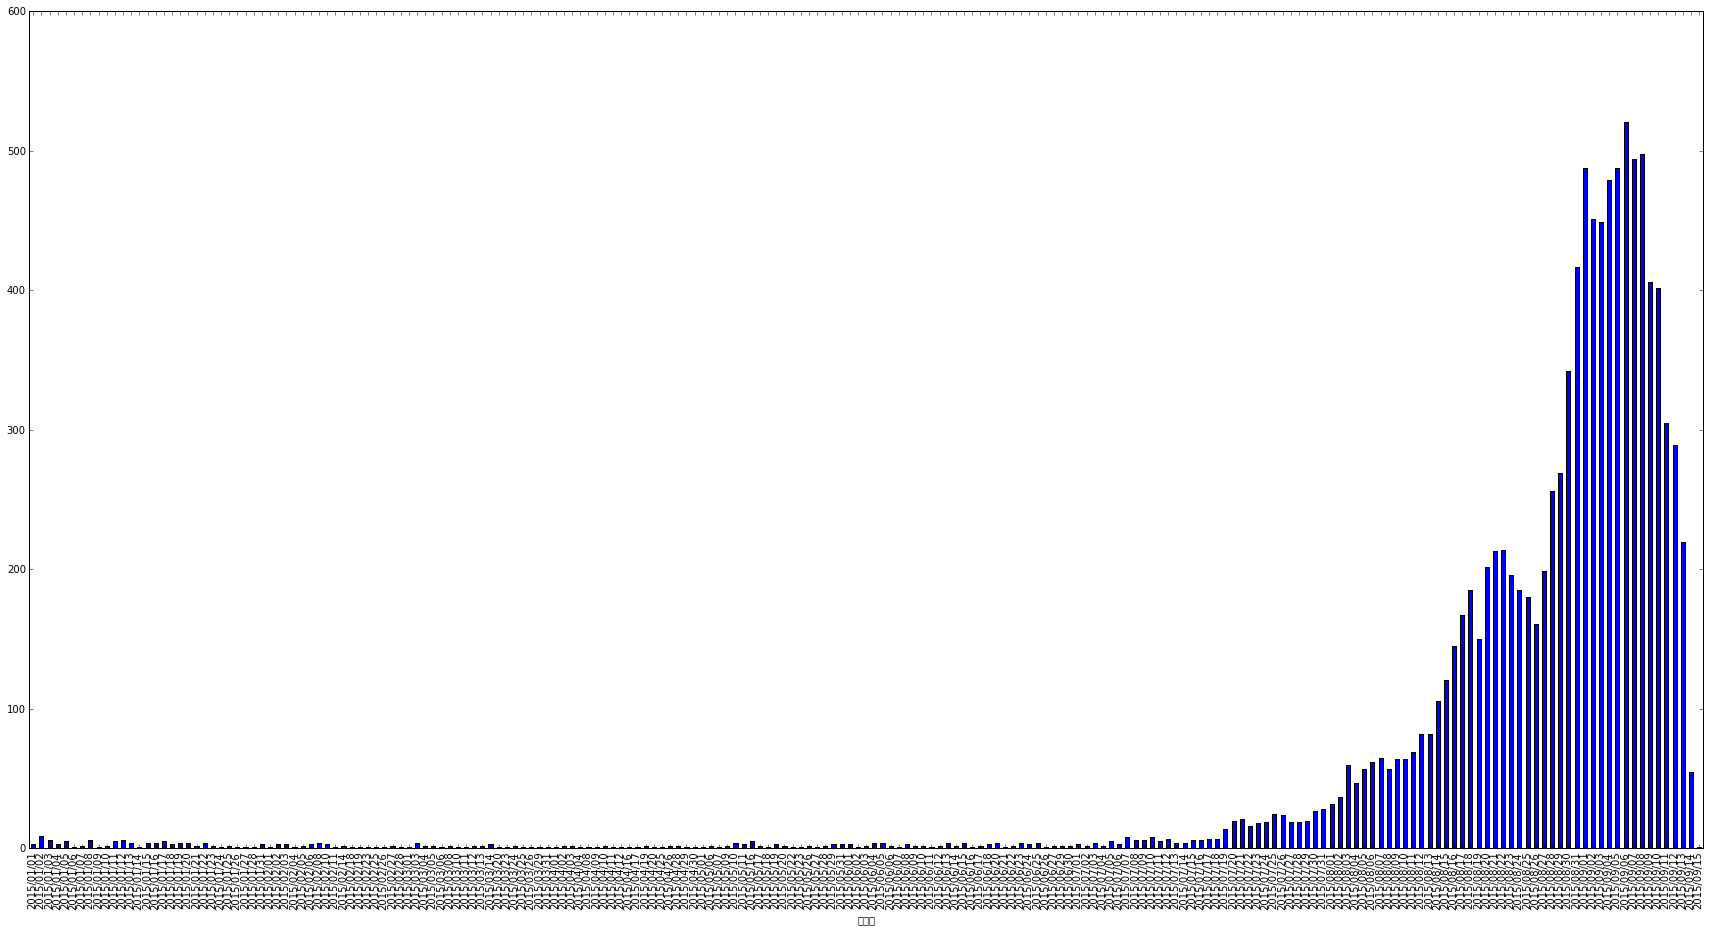

In [6]:
print df2015.groupby(['發病日']).size().plot(figsize=(30,15), kind='bar')



In [35]:
import re
R = df2015.groupby(['發病日']).size().reset_index()
R = R [pd.notnull(R["發病日"]) ]
R.columns = ['t','incid']

R['t'] = R['t'].apply(lambda x: re.sub('\/','-',x))
R = R.set_index('t')

R.to_csv('data/dengue_for_R.csv') #,header=False)


In [ ]:
cwb_tn = pd.read_csv('../OPEN_DATA/TN.txt')
cwb_tn.columns = ['date','觀測時間','溫度C','溫度F','天氣','風向','風力','陣風','能見度公里','相對溼度','海平面氣壓百帕','當日累積雨量','location']
cwb_tn['date'] = pd.to_datetime(cwb_tn['date'])
cwb_tn = cwb_tn.set_index(cwb_tn.date)
cwb_tn = cwb_tn.convert_objects(convert_numeric=True)

print cwb_tn.head(5)
plt.rcParams["font.family"] = "SimHei"

Fig1 = cwb_tn['當日累積雨量'].plot(title=u'台南市降雨量')
Fig1 = matplotlib.pyplot.gcf()
Fig1.set_size_inches(20,10)

#Fig2 = cwb_tn['溫度C'].plot(title=u'台南市溫度C')
#Fig2 = matplotlib.pyplot.gcf()
#Fig2.set_size_inches(20,10)

#Fig3 = cwb_tn['相對溼度'].plot(title=u'相對溼度')
#Fig3 = matplotlib.pyplot.gcf()
#Fig3.set_size_inches(20,10)


In [ ]:
plt.rcParams["font.family"] = "SimHei"
print df2015.groupby(['居住縣市','居住村里']).size().order(ascending=False)
df2015.groupby(['居住縣市','居住村里']).size().order(ascending=False).plot(figsize=(50,25), kind='bar')

In [ ]:
df2015.groupby(['通報日','居住村里']).size().unstack(1).plot(figsize=(16,8))

In [ ]:
df = pd.read_csv('TN.txt')
df.columns = ['date','觀測時間','溫度C','溫度F','天氣','風向','風力','陣風','能見度公里','相對溼度','海平面氣壓百帕','當日累積雨量','location']
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df.date)
df = df.convert_objects(convert_numeric=True)


In [ ]:
import plotly.tools as tls

tls.embed("https://plot.ly/~iamtomstone/167/")

# Send to elastic

In [41]:
! wget https://raw.githubusercontent.com/kiang/TainanDengueMap/gh-pages/cdc/points.json
#j = requests.get(JURL)
#j.text()
#! curl -s -XPOST http://localhost:9200/_bulk --data-binary @points.json
import pandas as pd 
test = pd.read_json('points.json')
test.ix(['1.0'])[1]

test = test.T.reset_index().drop('index', 1)
final = pd.DataFrame()
for city in range(0,21):
    for x in test.ix[city]['records']:
        df = pd.DataFrame(x.items()).T
        df.columns = df.iloc[0]
        df = df.ix[1:]
        final = pd.concat([df, final])
final.sickdate = pd.to_datetime(final.sickdate)
final['location'] = final.lat +','+ final.lng

--2015-09-11 23:37:33--  https://raw.githubusercontent.com/kiang/TainanDengueMap/gh-pages/cdc/points.json
Resolving raw.githubusercontent.com... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address 'raw.githubusercontent.com'


In [40]:

from elasticsearch import Elasticsearch
import json

es = Elasticsearch("127.0.0.1:9200")

maps = '{"mappings":{"txt":{"properties":{"count":{"type":"long"},"immigration":{"type":"long"},"lat":{"type":"string"},"lng":{"type":"string"},"location":{"type":"geo_point"},  "sickdate":{"type":"date","format":"dateOptionalTime"}}}}}'
es.indices.create(index="dengue", body=maps)

tmp=final.to_json(orient = "records",date_format='iso')
df_json= json.loads(tmp)

for doc in df_json:
    es.index("dengue","txt",doc)


In [19]:
final.head(3)

,lat,count,lng,immigration,sickdate
1,24.47656,1,118.42771,1,2015-06-13
1,22.68194,1,120.28886,0,2015-09-02
1,22.96363,1,120.18495,0,2015-08-27


In [38]:
final

,lat,count,lng,immigration,sickdate,location
1,24.47656,1,118.42771,1,2015-06-13,"24.47656,118.42771"
1,22.68194,1,120.28886,0,2015-09-02,"22.68194,120.28886"
1,22.96363,1,120.18495,0,2015-08-27,"22.96363,120.18495"
1,22.77094,1,121.12264,1,2012-03-30,"22.77094,121.12264"
1,22.80850,1,121.11250,1,2010-09-07,"22.80850,121.11250"
1,22.79284,1,121.10939,1,2006-08-18,"22.79284,121.10939"
1,22.79284,1,121.10939,1,2006-08-13,"22.79284,121.10939"
1,23.25465,1,121.39076,1,2005-09-13,"23.25465,121.39076"
1,22.78455,1,121.11403,1,2005-08-02,"22.78455,121.11403"
1,22.78455,1,121.11403,1,2005-08-02,"22.78455,121.11403"
